# Contents
## 01 Import libraries
## 02 Import data
## 03 Investigate distribution of failed orders
## 06 Cancel Flag
## 05 Plot by time

# 01 Import libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

# 02 Import data

In [2]:
#create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Projects\Gett"

In [3]:
# import orders
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'data_orders.csv'))

In [4]:
#import offers
offers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'data_offers.csv'))

In [5]:
#check them out
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [6]:
df.shape

(10716, 8)

In [7]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [8]:
offers.shape

(334363, 2)

In [9]:
10716/334363

0.032049000637032206

# 03 Investigate Distribution of Cancelled orders

array([[<Axes: title={'center': 'origin_longitude'}>,
        <Axes: title={'center': 'origin_latitude'}>,
        <Axes: title={'center': 'm_order_eta'}>],
       [<Axes: title={'center': 'order_gk'}>,
        <Axes: title={'center': 'order_status_key'}>,
        <Axes: title={'center': 'is_driver_assigned_key'}>],
       [<Axes: title={'center': 'cancellations_time_in_seconds'}>,
        <Axes: >, <Axes: >]], dtype=object)

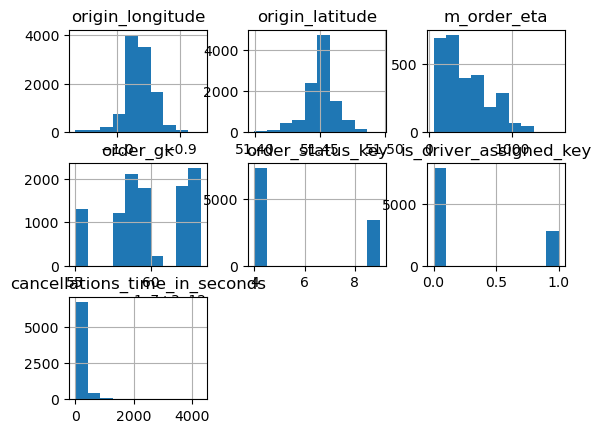

In [10]:
df.hist()

In [11]:
# create a crosstab of order_status_key and is_druver_assigned_key
status_driver = pd.crosstab(df['order_status_key'], df['is_driver_assigned_key'])

In [12]:
status = {
    4: 'Cancelled by Client',
    9: 'Cancelled by System'
}

In [13]:
#take a look
status_driver

is_driver_assigned_key,0,1
order_status_key,,
4,4496,2811
9,3406,3


In [14]:
#rename the rows
status_driver = status_driver.rename(index = status)

In [15]:
status_driver

is_driver_assigned_key,0,1
order_status_key,,
Cancelled by Client,4496,2811
Cancelled by System,3406,3


In [16]:
#rename the columns
status_driver = status_driver.rename(columns = { 0: 'No', 1 : 'Yes'})

In [17]:
status_driver

is_driver_assigned_key,No,Yes
order_status_key,,
Cancelled by Client,4496,2811
Cancelled by System,3406,3


<Axes: xlabel='order_status_key'>

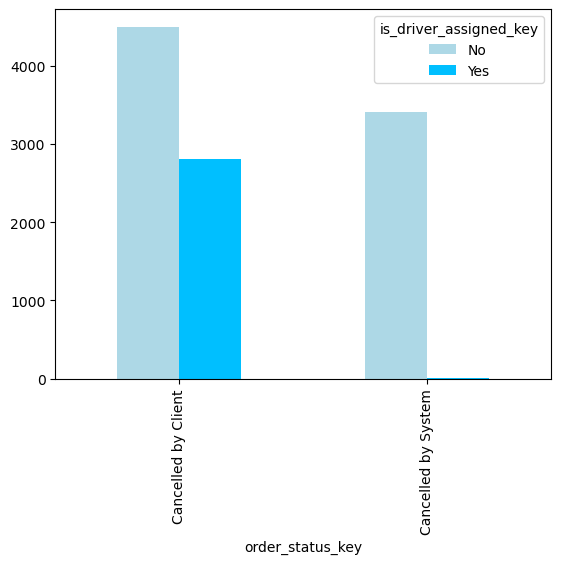

In [18]:
#quick and dirty bar
status_driver.plot.bar(color = ['lightblue', 'deepskyblue'])

array([[<Axes: title={'center': 'order_status_key'}>,
        <Axes: title={'center': 'is_driver_assigned_key'}>]], dtype=object)

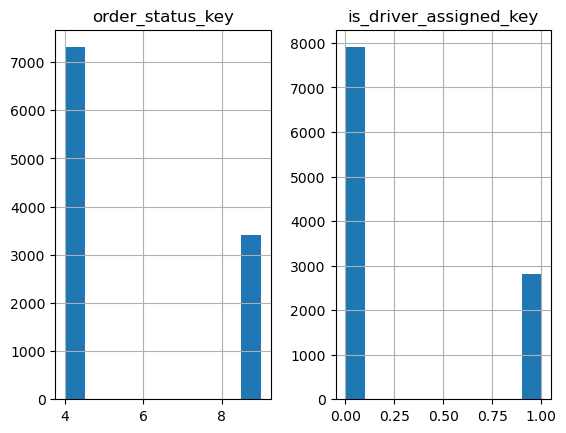

In [19]:
df[['order_status_key', 'is_driver_assigned_key']].hist()

In [20]:
# create a crosstab the other way round
driver_status = pd.crosstab(df['is_driver_assigned_key'], df['order_status_key'])

In [21]:
driver_status

order_status_key,4,9
is_driver_assigned_key,,
0,4496,3406
1,2811,3


In [22]:
driver_status = driver_status.rename(index = { 0: 'No', 1 : 'Yes'})

In [23]:
driver_status

order_status_key,4,9
is_driver_assigned_key,,
No,4496,3406
Yes,2811,3


In [24]:
driver_status = driver_status.rename(columns = status)

In [25]:
driver_status

order_status_key,Cancelled by Client,Cancelled by System
is_driver_assigned_key,,
No,4496,3406
Yes,2811,3


<Axes: xlabel='is_driver_assigned_key'>

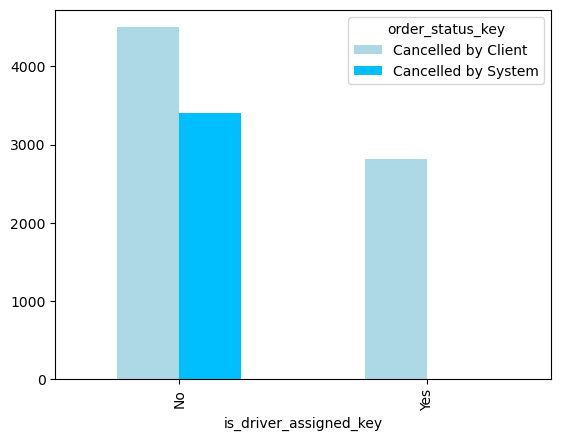

In [26]:
#quick and dirty bar
driver_status.plot.bar(color = ['lightblue', 'deepskyblue'])

# 04 cancel flag


In [27]:
#setting up a cancelled by / driver flag
df.loc[(df['is_driver_assigned_key'] == 0) & (df['order_status_key'] == 4), 'cancelled'] = 'Client - No'

In [28]:
df.loc[(df['is_driver_assigned_key'] == 0) & (df['order_status_key'] == 9), 'cancelled'] = 'System - No'

In [29]:
df.loc[(df['is_driver_assigned_key'] == 1) & (df['order_status_key'] == 4), 'cancelled'] = 'Client - Yes'

In [30]:
df.loc[(df['is_driver_assigned_key'] == 1) & (df['order_status_key'] == 9), 'cancelled'] = 'System - Yes'

In [31]:
df['cancelled'].value_counts(dropna = False) 

cancelled
Client - No     4496
System - No     3406
Client - Yes    2811
System - Yes       3
Name: count, dtype: int64

# 05 Plot by time

In [32]:
#check out time
df.order_datetime.head()

0    18:08:07
1    20:57:32
2    12:07:50
3    13:50:20
4    21:24:45
Name: order_datetime, dtype: object

In [33]:
df.order_datetime.describe()

count        10716
unique        9921
top       23:36:03
freq             4
Name: order_datetime, dtype: object

In [34]:
# create a crosstab
cancelled_time = pd.crosstab(df['order_datetime'], df['cancelled'])

In [35]:
cancelled_time

cancelled,Client - No,Client - Yes,System - No,System - Yes
order_datetime,,,,
00:00:02,0,0,1,0
00:00:03,1,0,0,0
00:00:05,1,0,0,0
00:00:11,1,0,0,0
00:00:16,1,0,0,0
...,...,...,...,...
23:59:34,0,0,1,0
23:59:40,1,0,0,0
23:59:42,1,0,0,0


<Axes: xlabel='order_datetime'>

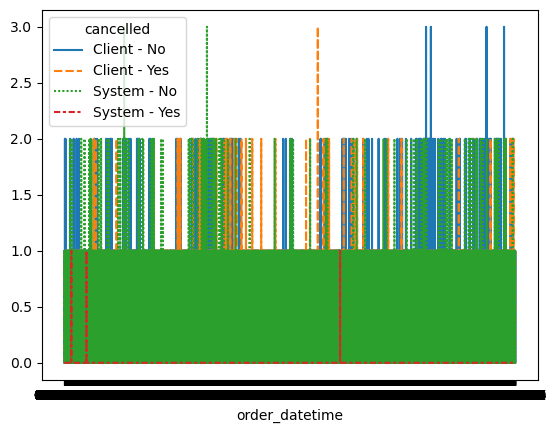

In [36]:
#quick and dirty plot
sns.lineplot(data = cancelled_time)

In [37]:
#export data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders.csv'))

In [38]:
df.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
cancelled                         object
dtype: object

In [39]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

C:\Users\Asus 17\AppData\Local\Temp\ipykernel_12088\512533147.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_datetime'] = pd.to_datetime(df['order_datetime'])


In [40]:
# extract hour from order_datetime
df['hour'] = df['order_datetime'].dt.hour

In [41]:
df.head(20)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,cancelled,hour
0,2024-01-18 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,Client - Yes,18
1,2024-01-18 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,Client - No,20
2,2024-01-18 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,Client - Yes,12
3,2024-01-18 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,Client - Yes,13
4,2024-01-18 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,System - No,21
5,2024-01-18 21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN,System - No,21
6,2024-01-18 07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN,System - No,7
7,2024-01-18 07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN,System - No,7
8,2024-01-18 08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN,System - No,8
9,2024-01-18 06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0,Client - No,6


In [42]:
# group by hour and category, then count orders
grouped = df.groupby(['hour', 'cancelled']).size().unstack(fill_value = 0)

<Axes: xlabel='hour'>

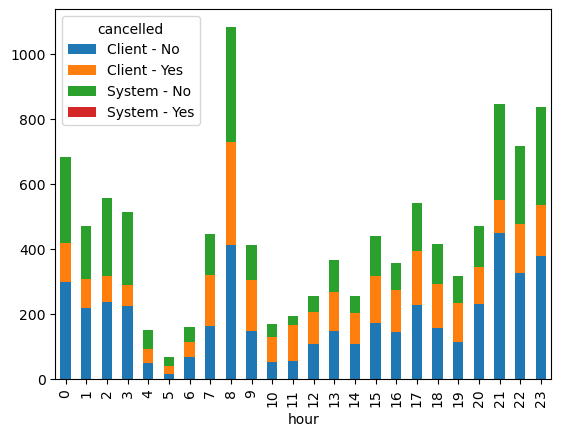

In [43]:
grouped.plot(kind = 'bar', stacked = True)

<Axes: xlabel='hour'>

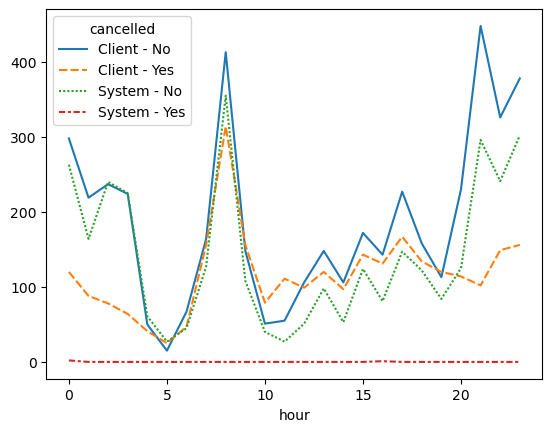

In [44]:
#quick and dirty plot
sns.lineplot(data = grouped)

In [45]:
df.shape

(10716, 10)

In [46]:
df2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders.csv'))

In [47]:
df2.head()

,Unnamed: 0,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,cancelled
0,0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,Client - Yes
1,1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,Client - No
2,2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,Client - Yes
3,3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,Client - Yes
4,4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,System - No
